<a href="https://colab.research.google.com/github/AnkitaRoge2002/task-1/blob/main/Stock_Market_%5Btask_5%5Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files
dataset = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
df = pd.read_csv('/content/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-05,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,35185031017
1,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046
2,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,40030862141
3,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,36302664750
4,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,38734079049
...,...,...,...,...,...,...,...
361,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,23314.199219,25849159141
362,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,22978.117188,28389250717
363,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,22846.507813,26288169966
364,2022-08-04,22848.214844,23198.009766,22485.701172,22630.957031,22630.957031,25120229769


In [ ]:
df.shape

(366, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
8/8 [==============================] - 12s 155ms/step - loss: 0.1103
Epoch 2/50
8/8 [==============================] - 1s 147ms/step - loss: 0.0443
Epoch 3/50
8/8 [==============================] - 1s 156ms/step - loss: 0.0306
Epoch 4/50
8/8 [==============================] - 1s 147ms/step - loss: 0.0227
Epoch 5/50
8/8 [==============================] - 1s 147ms/step - loss: 0.0248
Epoch 6/50
8/8 [==============================] - 1s 156ms/step - loss: 0.0200
Epoch 7/50
8/8 [==============================] - 1s 150ms/step - loss: 0.0157
Epoch 8/50
8/8 [==============================] - 1s 146ms/step - loss: 0.0143
Epoch 9/50
8/8 [==============================] - 1s 155ms/step - loss: 0.0131
Epoch 10/50
8/8 [==============================] - 1s 146ms/step - loss: 0.0117
Epoch 11/50
8/8 [==============================] - 1s 153ms/step - loss: 0.0130
Epoch 12/50
8/8 [==============================] - 1s 158ms/step - loss: 0.0135
Epoch 13/50
8/8 [==============================]

In [ ]:
model = load_model('stock_prediction.h5')

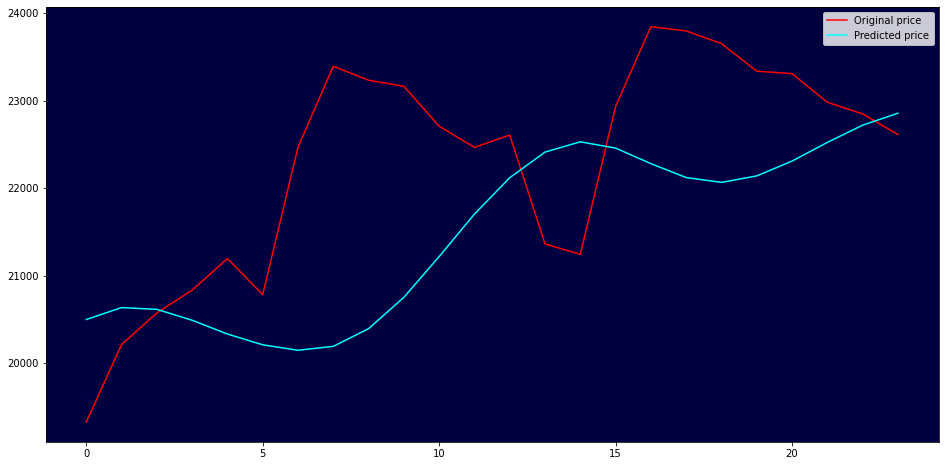

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()